In [2]:
%load_ext autoreload
%autoreload 2

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from glob import glob
from scipy.signal import find_peaks
from functools import partial
from lmfit.models import GaussianModel # type: ignore

from RaTag.scripts.wfm2read_fast import wfm2read # type: ignore
from RaTag.scripts.wfm_sca_trigger import moving_average # type: ignore
from RaTag.scripts.analyse_field_scans import * # type: ignore
import RaTag.transport as trans # type: ignore
import RaTag.cuts as cuts

# Recommended rcParams for larger font sizes
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['axes.titlesize'] = 18


In [139]:
def get_baseline(V, n_points=200):
    """Get the baseline of a waveform by averaging the first n_points."""
    return np.mean(V[:n_points])

def alpha_peaks(V):
    bs = get_baseline(V)
    return np.max(V) - bs

In [158]:
path = '/Users/pabloherrero/sabat/RaTagging/scope_data/waveforms/SCA/Ch4_NoSCA'
filesNo = sorted(glob(path + '/*.wfm') )
len(filesNo)

300

In [194]:
def analyse_analog_file(file):
    wf = wfm2read(file, verbose=False)
    V, t = wf[0], wf[1]  # in mV and ns
    peaks = []
    if len(V.shape) > 1:
        for v in V:
            peaks.append(alpha_peaks(v))
    else:
        peaks.append(alpha_peaks(V))
    return np.array(peaks)

def compute_analog_path(path):
    files = sorted(glob(path + '/*.wfm') )
    all_peaks = []
    for file in files:
        peaks = analyse_analog_file(file)
        all_peaks.append(peaks)
    return np.concatenate(all_peaks)

In [195]:
peaks = compute_analog_path(path)

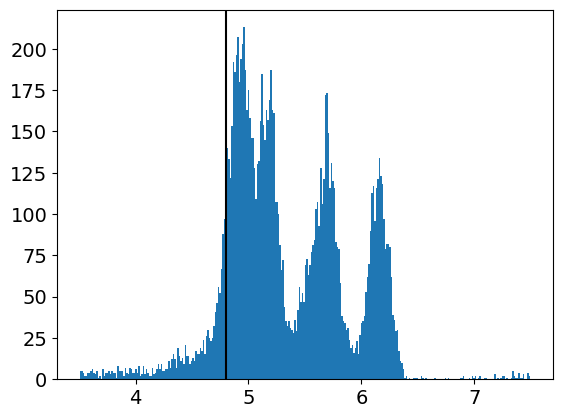

In [196]:
peaks_cut = peaks[(peaks > 3.5) & (peaks < 7.5)]
plt.hist(peaks_cut, bins=300);
plt.axvline(4.8, color='k')

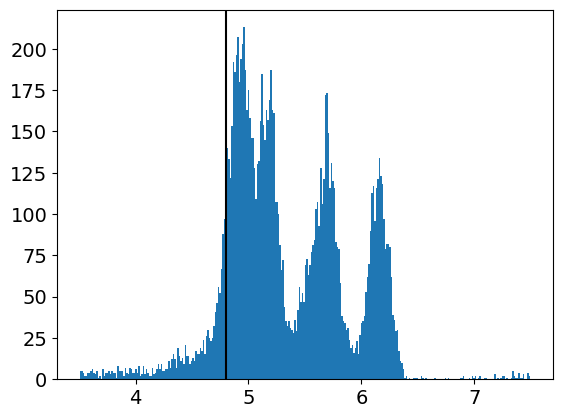

In [ ]:
peaks_cut = peaks[(peaks > 3.5) & (peaks < 7.5)]
plt.hist(peaks_cut, bins=300);
plt.axvline(4.8, color='k')